In [10]:
# Initial imports
import yfinance as yf #Had to install yfinance (pip install yfinance --upgrade --no-cache-dir) from (https://pypi.org/project/yfinance/)
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
SPS_df = yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [33]:
returns = np.log(1+ SPS_df['Adj Close'].pct_change())

In [34]:
mu, sigma = returns.mean(), returns.std()

In [35]:
simulated_returns = np.random.normal(mu, sigma, 252)#252 represents 252 days of trading or one year. You can adjust this timeframe
simulated_returns

array([ 0.02435396,  0.01740615,  0.03652175, -0.04587599, -0.03959348,
       -0.02798557,  0.0218665 , -0.0164776 , -0.00763937,  0.00673978,
        0.05741711,  0.00822334,  0.00918485, -0.06684357,  0.05099499,
        0.00552279, -0.01919847,  0.00572751, -0.03810236, -0.03077786,
       -0.08078494, -0.04110583,  0.09459369,  0.00073784,  0.04786624,
        0.03027768, -0.03648066, -0.02195996, -0.02061412,  0.02832452,
       -0.01889124,  0.02864175,  0.03332148, -0.01288789, -0.02686333,
       -0.03753326,  0.02281247,  0.01786871, -0.10940166, -0.06431553,
        0.02145918,  0.03067637, -0.01709342,  0.06019871, -0.0180266 ,
        0.00946288,  0.0237837 ,  0.01263761, -0.02455664,  0.01274528,
        0.02334376,  0.02388678,  0.0314757 , -0.01882346, -0.03028732,
        0.04972841,  0.01872381, -0.01610847,  0.0422446 , -0.00268215,
        0.05188389,  0.0083695 ,  0.02174503,  0.03558051, -0.0651938 ,
       -0.00017138, -0.05963231, -0.04719629,  0.02216948, -0.04

In [36]:
initial = SPS_df['Adj Close'].iloc[-1]

In [37]:
simulated_price = initial * (simulated_returns + 1).cumprod()

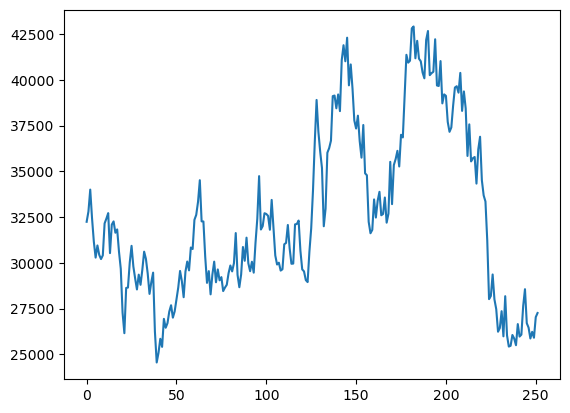

In [38]:
plt.plot(simulated_price)

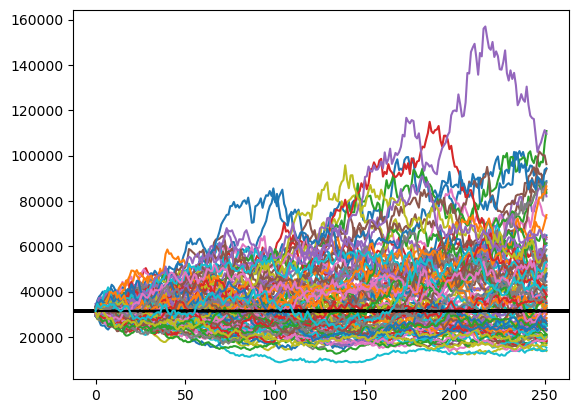

In [39]:
for i in range(100):
    simulated_returns = np.random.normal(mu, sigma, 252)
    simulated_price = initial * (simulated_returns + 1).cumprod()
    plt.axhline(initial, c='k')
    plt.plot(simulated_price)